<a href="https://colab.research.google.com/github/Cvelsen22/Carmelo-Velez---Data-Analysis-Portfolio/blob/main/customers_and_orders_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technical Challenge ! Custiomers and Orders - The lifeblood of any business!

In [168]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve

In [169]:
# Assign url of file: url
url_1='https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/data/orders.csv'
# Save file locally
urlretrieve(url_1,'orders.csv')
# Read file into a DataFrame and print its head
orders = pd.read_csv('orders.csv', sep=',')
orders.head()

,CustomerID,OrderID,Date,OrderTotal,ProductName,Price
0,8091,7742581,2021-07-26 14:40:10.783,95.0,Z03,90.0
1,902139,7742778,2021-08-08 05:01:21.120,60.0,0844 A/C,60.0
2,2300266,7742593,2021-07-27 11:00:16.020,185.0,M07,90.0
3,2300266,7742593,2021-07-27 11:00:16.020,185.0,M09,90.0
4,5173013,7742609,2021-07-28 14:26:13.930,165.0,0324,160.0


In [170]:
# Assign url of file: url
url_2='https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/data/customers.csv'
# Save file locally
urlretrieve(url_2,'customers.csv')
# Read file into a DataFrame and print its head
customers = pd.read_csv('customers.csv', sep=',')
customers.head()

,CustomerID,FirstName,LastName,City,State
0,6192,Randi,Piedrahita,Canoga Park,CA
1,5100595,Christopher,Abraham,Loma Linda,CA
2,1902451,Elvis,Jauregui,Los Angeles,CA
3,1906377,Jose,Mota-Sanchez,Downey,CA
4,1902406,Scott,McCrorie,Long Beach,CA


# Exercise 1: Processing Customers data (difficulty medium)

In [171]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  602 non-null    int64 
 1   FirstName   602 non-null    object
 2   LastName    602 non-null    object
 3   City        602 non-null    object
 4   State       602 non-null    object
dtypes: int64(1), object(4)
memory usage: 23.6+ KB


**Question 1:** How many customers are in the file?
(as help, we have added some comments and starter code to help you structure the solution)

In [172]:
customers['CustomerID'].describe()

count    6.020000e+02
mean     3.500252e+06
std      2.186549e+06
min      5.014000e+03
25%      1.500066e+06
50%      5.100984e+06
75%      5.370667e+06
max      5.415503e+06
Name: CustomerID, dtype: float64

In [173]:
# CustomerID summary statistics shows that the column is float type. Lets convert it to a category

In [174]:
# Convert CustomerID from float to category
customers['UserID'] = customers['CustomerID'].astype('category')

In [175]:
# Write an assert statement confirming the change
assert customers['UserID'].dtype == 'category'

In [176]:
# Print new summary statistics 
print(customers['UserID'].describe())

count       602
unique      471
top       10986
freq          5
Name: UserID, dtype: int64


There are 471 unique customers

**Question 2:** In how many different states do the customers live in?

In [177]:
customers['State'].describe()

count     602
unique     16
top        CA
freq      562
Name: State, dtype: object

Our customers live in 16 different states



**Question 3** What is the state with most customers?

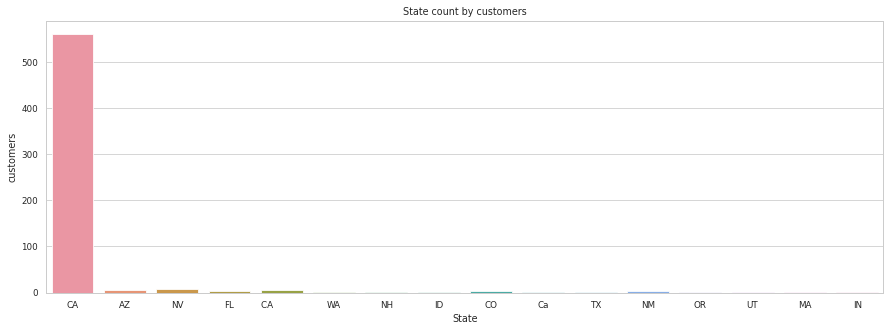

In [178]:
# Create count plot with region on the X-axis
fig, ax = plt.subplots()
fig.set_size_inches([15, 5])
sns.set_style("whitegrid")
sns.set_context("paper")
custom_palette=['#50d11f','#444444','#bcbcbc','#ffd966','#a7372f','#660000','#f1e432','#cc0000','#b9541d','#3d85c6']
sns.set_palette(custom_palette)

g=sns.countplot(x=customers['State'].sort_index(ascending=True))
g.set_title("State count by customers")
plt.xticks(rotation=0)
g.set(xlabel="State", 
      ylabel="customers")
# Show plot
plt.show()

California with 562 customers is the state with the most customers

**Question 4** What is the state with the least customers?

In [179]:
customers['State'].value_counts()

CA               562
NV                 8
AZ                 6
CA                 5
FL                 3
CO                 3
NM                 3
Ca                 2
TX                 2
UT                 2
WA                 1
NH                 1
ID                 1
OR                 1
MA                 1
IN                 1
Name: State, dtype: int64

Washington, New Hampshire, Idaho, Oregon, Massachusetts, and Indiana with one customer each occupied last pocisiton in custumer count.


**Question 5:** What is the most common last name?

In [180]:
customers['LastName'].sort_values(ascending=False).value_counts()

Smith              8
Zambrana           5
Gomez              5
Doggett            5
Montellano Luna    4
                  ..
Tindan             1
McMains            1
McNellis           1
Medina             1
McLean             1
Name: LastName, Length: 424, dtype: int64

Smith is the most common last name

# Exercise 2: Processing Orders data (difficulty high)

In [181]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29294 entries, 0 to 29293
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   29294 non-null  int64  
 1   OrderID      29294 non-null  int64  
 2   Date         27152 non-null  object 
 3   OrderTotal   29294 non-null  float64
 4   ProductName  29294 non-null  object 
 5   Price        29294 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.3+ MB


**Question #1:** How many unique orders are in the orders.csv file?

In [182]:
# Convert CustomerID from float to category
orders['UniqueOrderID'] = orders['OrderID'].astype('category')

In [183]:
orders['UniqueOrderID'].describe()

count       29294
unique      16672
top       5802666
freq           35
Name: UniqueOrderID, dtype: int64

There are 16672 unique orders

**Question #2:** What is the average number of items per order (rounded to two decimal places)?

In [191]:
orders['OrderTotal'].sum()/orders['UniqueOrderID'].value_counts().sum()

298.03922304908855

Every order has an average of 298 items

**Question #3:** What is the highest number of items per order?

In [194]:
orders['OrderTotal'].max()

3600.0

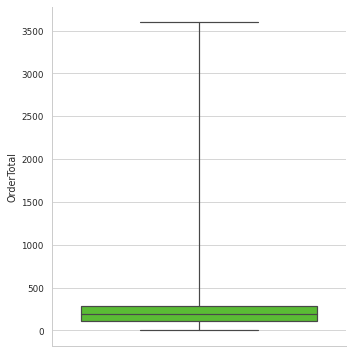

In [202]:
# Create a box plot 
sns.catplot(y="OrderTotal",data=orders,kind="box",whis=[0, 100])

In [204]:
highest_order=orders[orders['OrderTotal']==3600]
highest_order.value_counts()

CustomerID  OrderID  Date                     OrderTotal  ProductName  Price  UniqueOrderID
5464        7411097  2018-09-09 13:44:20.740  3600.0      0901         100.0  7411097          5
                                                          0902         200.0  7411097          5
                                                          0903         200.0  7411097          5
                                                          3369         70.0   7411097          5
                                                          3370         70.0   7411097          5
                                                          3371         80.0   7411097          5
            7553706  2019-06-09 07:28:33.873  3600.0      0901         100.0  7553706          5
                                                          0902         200.0  7553706          5
                                                          0903         200.0  7553706          5
                                   

In [206]:
highest_order_customer=customers[customers['CustomerID']==5464]
highest_order_customer

,CustomerID,FirstName,LastName,City,State,UserID
287,5464,Juan,Soto,Bell,CA,5464


 the highest number of items per order is 3600 that belongs to orders 7411097 and 7553706 both orders are from customer id 5464 Juan Soto from California

**Question #4:** What is the number of orders placed in October 2021?

In [207]:
orders_time_series = pd.read_csv('orders.csv', parse_dates=["Date"], index_col="Date")

In [210]:
orders_time_series.head()

,CustomerID,OrderID,OrderTotal,ProductName,Price
Date,,,,,
2021-07-26 14:40:10.783,8091,7742581,95.0,Z03,90.0
2021-08-08 05:01:21.120,902139,7742778,60.0,0844 A/C,60.0
2021-07-27 11:00:16.020,2300266,7742593,185.0,M07,90.0
2021-07-27 11:00:16.020,2300266,7742593,185.0,M09,90.0
2021-07-28 14:26:13.930,5173013,7742609,165.0,0324,160.0


In [235]:
october_2021_orders = orders_time_series[(orders_time_series.index >= '2021-10-1')&(orders_time_series.index <= '2021-10-31')]

In [236]:
october_2021_orders['UniqueOrderID'] = october_2021_orders['OrderID'].astype('category')

<ipython-input-236-4ae8237433c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_2021_orders['UniqueOrderID'] = october_2021_orders['OrderID'].astype('category')


In [237]:
october_2021_orders['UniqueOrderID'].describe()

count         437
unique        267
top       7789498
freq            9
Name: UniqueOrderID, dtype: int64

In [239]:
october_2021_orders['UniqueOrderID'].value_counts().sum()

437

There are 437 orders placed from October 2021

**Question #5:** Which customer spent the most amount of money in 2021?

In [241]:
orders_2021=orders_time_series[(orders_time_series.index >= '2021-01-01')&(orders_time_series.index <= '2021-12-31')]

In [242]:
orders_2021.head()

,CustomerID,OrderID,OrderTotal,ProductName,Price
Date,,,,,
2021-07-26 14:40:10.783,8091,7742581,95.0,Z03,90.0
2021-08-08 05:01:21.120,902139,7742778,60.0,0844 A/C,60.0
2021-07-27 11:00:16.020,2300266,7742593,185.0,M07,90.0
2021-07-27 11:00:16.020,2300266,7742593,185.0,M09,90.0
2021-07-28 14:26:13.930,5173013,7742609,165.0,0324,160.0


In [263]:
cx=orders_2021.groupby("CustomerID")["Price"].sum()
cx.sort_values(ascending=False)

CustomerID
5172443    7675.0
1907160    5485.0
5464       5470.0
5100984    5225.0
4300438    4960.0
            ...  
5370602     100.0
5415211     100.0
5415286     100.0
5370422      90.0
5370388      85.0
Name: Price, Length: 342, dtype: float64

In [264]:
most_money_2021_cx=customers[customers['CustomerID']==5172443]
most_money_2021_cx

,CustomerID,FirstName,LastName,City,State,UserID
171,5172443,Brandon,Divas,Los Angeles,CA,5172443


Brandon Divas from Los angeles placed the biggest order from 2021 with a total order of 7675.0$

**Question #6:** Historically, what is the best month for sales?

In [275]:
series_2021=orders_2021.sort_values('Date')

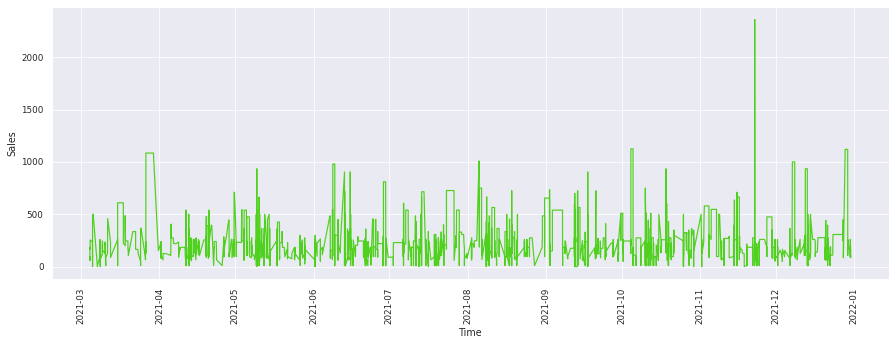

In [281]:
fig, ax = plt.subplots()
fig.set_size_inches([15, 5])
sns.set_style("darkgrid")
# Add the time-series for "OrderTotal" to the plot
ax.plot(series_2021.index,orders_2021['OrderTotal'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Sales')
plt.xticks(rotation=90)
# Show the figure
plt.show()

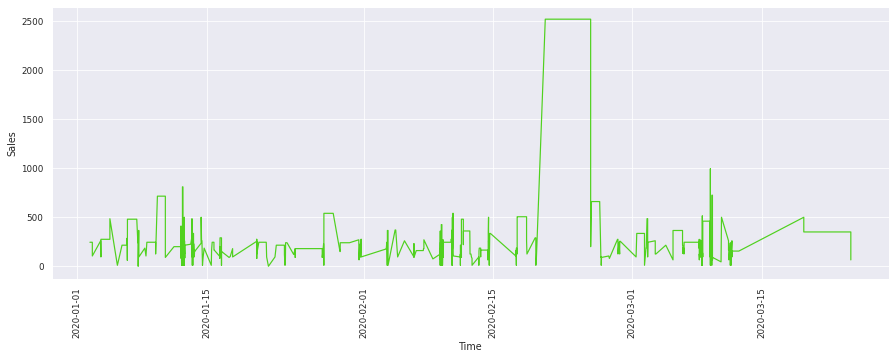

In [293]:
orders_2020=orders_time_series[(orders_time_series.index >= '2020-01-01')&(orders_time_series.index <= '2020-12-31')]
series_2020=orders_2020.sort_values('Date')

fig, ax = plt.subplots()
fig.set_size_inches([15, 5])
sns.set_style("darkgrid")
# Add the time-series for "OrderTotal" to the plot
ax.plot(series_2020.index,orders_2020['OrderTotal'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Sales')
plt.xticks(rotation=90)
# Show the figure
plt.show()

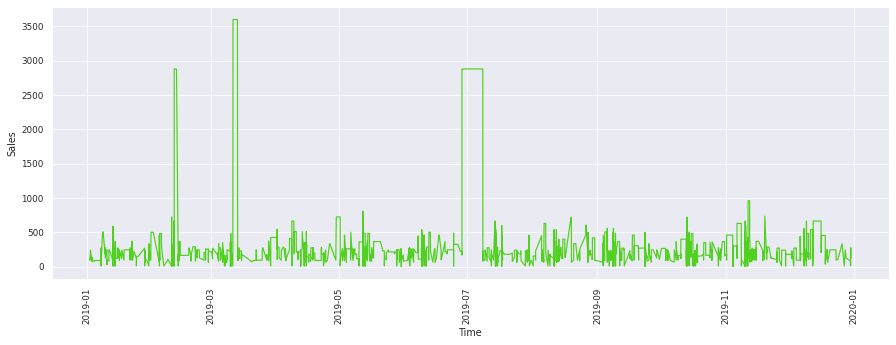

In [294]:
orders_2019=orders_time_series[(orders_time_series.index >= '2019-01-01')&(orders_time_series.index <= '2019-12-31')]
series_2019=orders_2019.sort_values('Date')

fig, ax = plt.subplots()
fig.set_size_inches([15, 5])
sns.set_style("darkgrid")
# Add the time-series for "OrderTotal" to the plot
ax.plot(series_2019.index,orders_2019['OrderTotal'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Sales')
plt.xticks(rotation=90)
# Show the figure
plt.show()

Theres a tendency for sales to increase at the end of the year(November)